In [39]:
from pathlib import Path
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from scipy import stats
#-------------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
#-------------------------------------------------------------------------
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#-------------------------------------------------------------------------
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#-------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
#-------------------------------------------------------------------------
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score, roc_auc_score
from sklearn.metrics import classification_report

In [4]:
data = pd.read_csv('heart.csv')
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
categorical_featurs = ['sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'ca', 'thal']

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [13]:
data_cleaned = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

ages = set(np.array(data_cleaned['age']))
print(ages)

bins = [25, 40, 60, 79]
which_bin = np.digitize(data_cleaned['age'], bins=bins)
binned_ages = pd.Series(which_bin)

{29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 74, 76, 77}


In [17]:
preprocessing_data = data_cleaned.drop('age', axis=1)
preprocessing_data = preprocessing_data.assign(age=binned_ages.values)

In [18]:
categorical_featurs = ['sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'ca', 'thal', 'age']
numerical_features = ['trestbps', 'chol', 'thalach', 'oldpeak']

In [20]:
X = preprocessing_data.drop('target', axis=1)
y = preprocessing_data['target']

In [21]:
numerica_pipline = Pipeline([
   ("poly", PolynomialFeatures(degree=2, include_bias=False)),
   ("norm", MinMaxScaler()),
   ("selection", RFE(LogisticRegression(max_iter=10000), n_features_to_select=4))
])


preprocessing_pipeline = ColumnTransformer([
    ('num', numerica_pipline, numerical_features),
    ('cat', OneHotEncoder(), categorical_featurs)
])

X_prepered = preprocessing_pipeline.fit_transform(X, y)

In [22]:
pca_3 = PCA(n_components=3)
pca_3.fit(X_prepered)
X_pca_3 = pca_3.transform(X_prepered)

In [23]:
pca_df_3 = pd.DataFrame(X_pca_3, columns={'feature1', 'feature2', 'feature3'})
pca_df_3 = pca_df_3.assign(target=y.values)

In [25]:
class1_features = pca_df_3[pca_df_3['target']==1]
class0_features = pca_df_3[pca_df_3['target']==0]

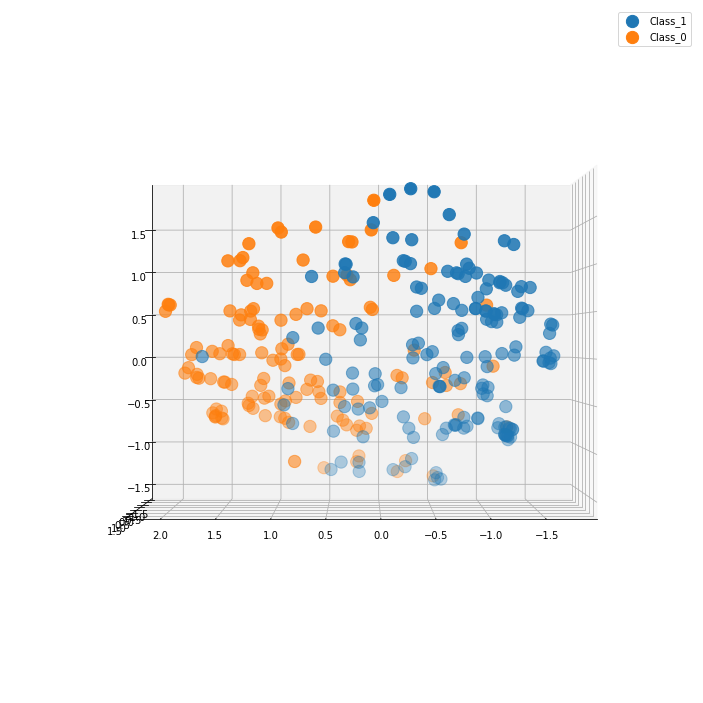

In [30]:
x_class1 = class1_features['feature1']
y_class1 = class1_features['feature2']
z_class1 = class1_features['feature2']

x_class0 = class0_features['feature1']
y_class0 = class0_features['feature2']
z_class0 = class0_features['feature2']


fig = plt.figure(figsize=(42, 42))


ax = fig.add_subplot(231, projection = '3d')
ax.scatter(x_class1, y_class1, z_class1, 'or', s=150, label='Class_1')
ax.scatter(x_class0, y_class0, z_class0, 'ob', s=150, label='Class_0')
ax.view_init(0, 90)
plt.legend()



In [44]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)
tsne_results = tsne.fit_transform(X_prepered)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 287 samples in 0.000s...
[t-SNE] Computed neighbors for 287 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 287 / 287
[t-SNE] Mean sigma: 1.117504
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.123589
[t-SNE] KL divergence after 1750 iterations: 0.754942


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.utils import shuffle

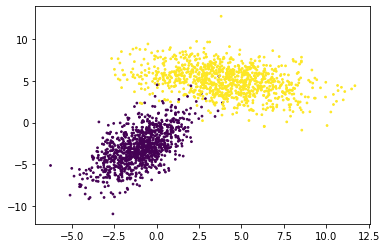

In [32]:
num_points = 1000

mean_1 = [-1, -3]
cov_1 = [[2, 2], [2, 5]]
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)

mean_2 = [4, 5]
cov_2 = [[7, -2], [-2, 3]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

X = np.concatenate([x_1, x_2])
y = np.array([0] * num_points + [1] *  num_points) 
X, y = shuffle(X, y, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s = 3, c = y)

In [33]:
for i in range(2, 5):
    gmm = GaussianMixture(n_components=i, covariance_type='full')
    gmm_labels = gmm.fit_predict(X)
    silhouette_avg = silhouette_score(X, gmm_labels)
    print("For n_clusters =", i, " silhouette average:", silhouette_avg)

For n_clusters = 2  silhouette average: 0.6394968489623488
For n_clusters = 3  silhouette average: 0.5235225717818504
For n_clusters = 4  silhouette average: 0.40244347279928855


In [34]:
GMM = GaussianMixture(n_components=2, covariance_type='full')
GMM.fit(X)
print('means ')
print(GMM.means_)
print('covariances ')
print(GMM.covariances_)

means 
[[-1.00452156 -3.05491408]
 [ 3.99645248  4.98128758]]
covariances 
[[[ 1.92313149  1.72800744]
  [ 1.72800744  4.51788175]]

 [[ 6.48446403 -1.46986106]
  [-1.46986106  3.05616714]]]


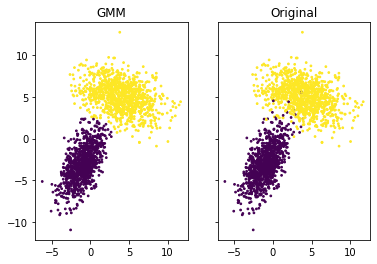

In [35]:
labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)

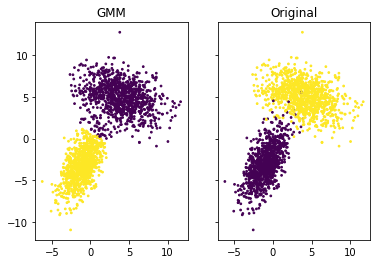

In [36]:
GMM = GaussianMixture(n_components=2, covariance_type='spherical')
GMM.fit(X)

labels = GMM.predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.set_title('GMM')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)

In [53]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
from joblib import dump

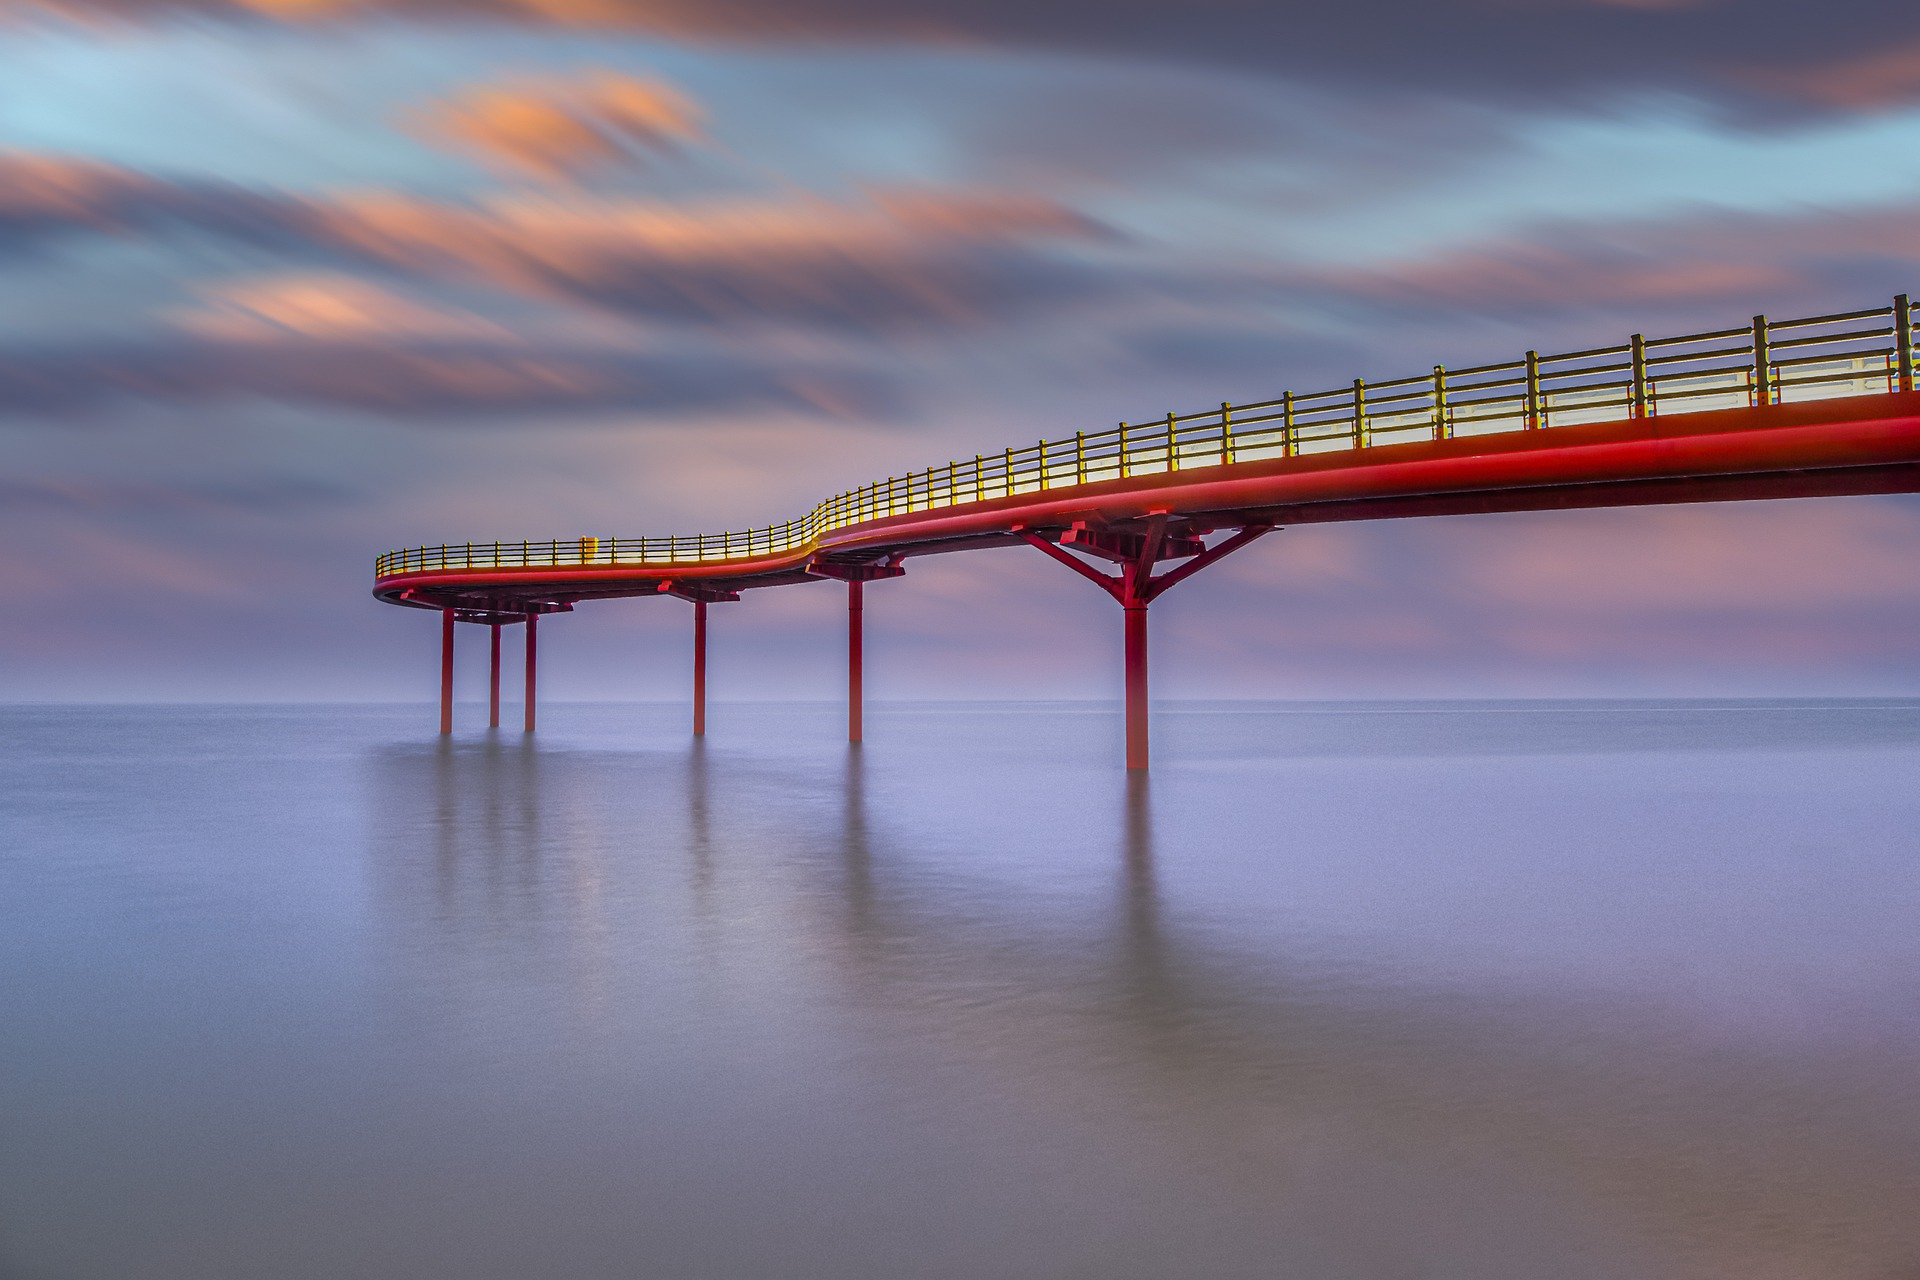

In [58]:
im = Image.open("ocean-g1ab68af4b_1920.jpg")
im

In [59]:
pixel_np = np.asarray(im)
image_height = im.height
image_width = im.width
pixel_np = np.reshape(pixel_np, (image_height * image_width, 3))
pd.DataFrame(pixel_np, columns=["r", "g", "b"]).head()

r    g    b
0  167  141  144
1  167  141  144
2  167  140  145
3  167  140  145
4  167  140  145

In [60]:
num_of_centroids = 16 
num_of_runs = 10 
max_iterations = 300
verbosity = 0 

compressor = KMeans(n_clusters=num_of_centroids, n_init=num_of_runs, max_iter=max_iterations, verbose=verbosity)
compressor.fit(pixel_np)

KMeans(n_clusters=16)

In [61]:
dump(compressor, "compressor.joblib")

['compressor.joblib']

In [62]:
pixel_centroid = np.array([list(compressor.cluster_centers_[label]) for label in compressor.labels_])

In [63]:
pixel_centroid = pixel_centroid.astype("uint8")
pixel_centroids_reshaped = np.reshape(pixel_centroid, (image_height, image_width, 3), "C")

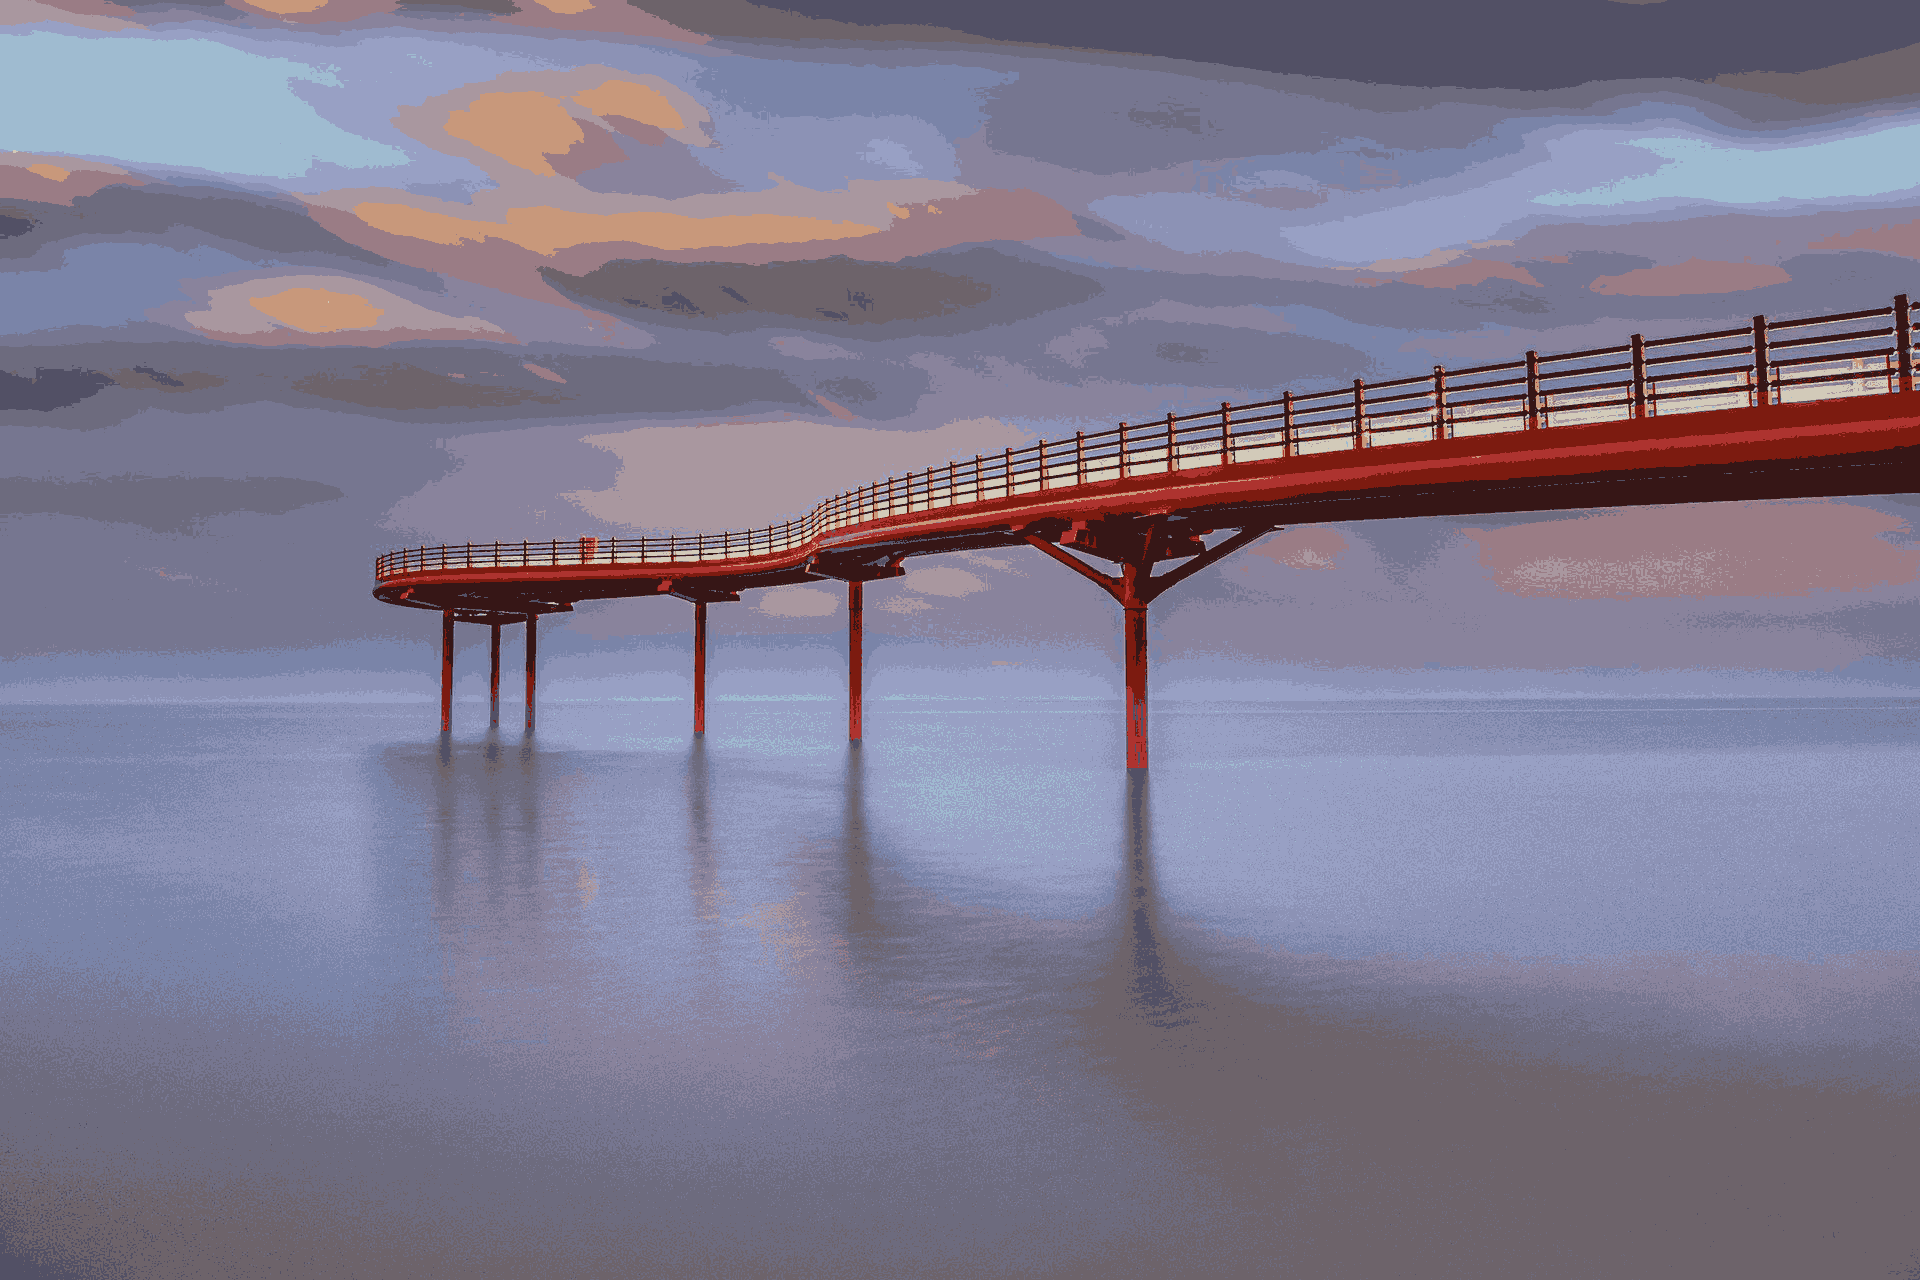

In [64]:
compressed_im = Image.fromarray(pixel_centroids_reshaped)
compressed_im.save("ocean_compressed.jpeg")
compressed_im

Fitting model on a small sub-sample of the data
done in 0.999s.
Predicting color indices on the full image (k-means)
done in 0.437s.
Predicting color indices on the full image (random)
done in 2.488s.


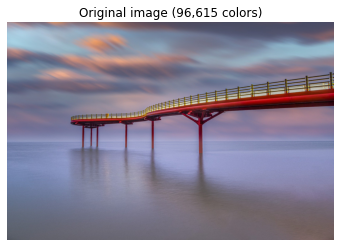

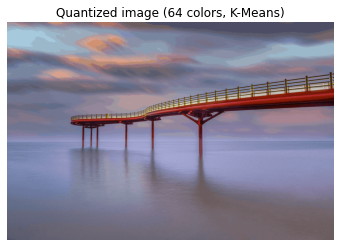

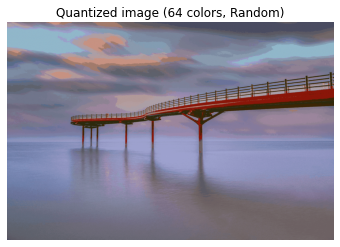

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64

# Load the Summer Palace photo
im = Image.open("ocean-g1ab68af4b_1920.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
im = np.array(im, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(im.shape)
assert d == 3
image_array = np.reshape(im, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(im)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

Fitting model on a small sub-sample of the data
done in 0.607s.
Predicting color indices on the full image (k-means)
done in 0.336s.
Predicting color indices on the full image (random)
done in 1.636s.


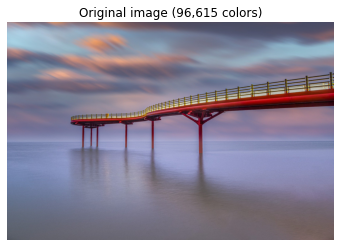

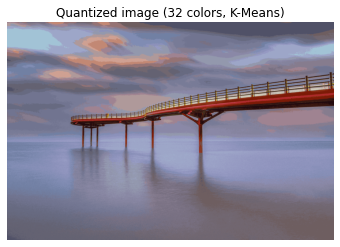

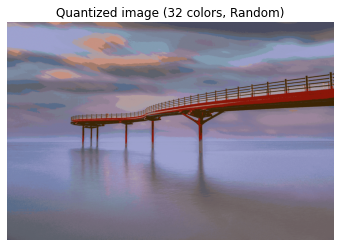

In [70]:
n_colors = 32

# Load the Summer Palace photo
im = Image.open("ocean-g1ab68af4b_1920.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
im = np.array(im, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(im.shape)
assert d == 3
image_array = np.reshape(im, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(im)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

Fitting model on a small sub-sample of the data
done in 0.467s.
Predicting color indices on the full image (k-means)
done in 0.232s.
Predicting color indices on the full image (random)
done in 0.883s.


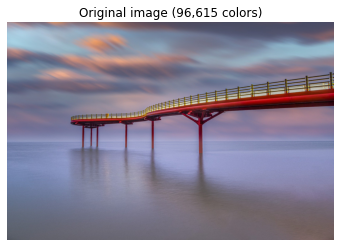

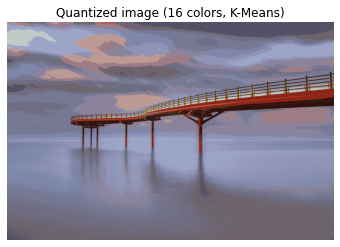

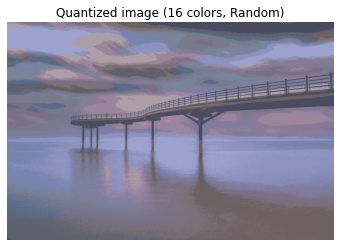

In [71]:
n_colors = 16

# Load the Summer Palace photo
im = Image.open("ocean-g1ab68af4b_1920.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
im = np.array(im, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(im.shape)
assert d == 3
image_array = np.reshape(im, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(im)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

Fitting model on a small sub-sample of the data
done in 0.365s.
Predicting color indices on the full image (k-means)
done in 0.194s.
Predicting color indices on the full image (random)
done in 0.546s.


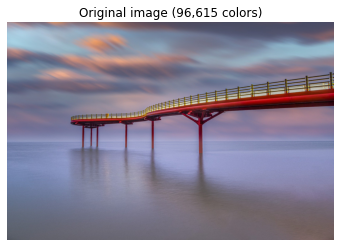

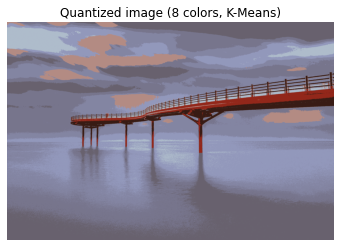

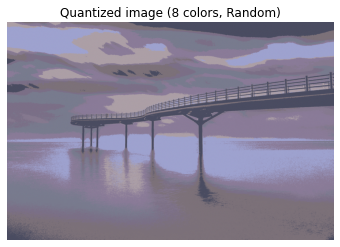

In [72]:
n_colors = 8

# Load the Summer Palace photo
im = Image.open("ocean-g1ab68af4b_1920.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
im = np.array(im, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(im.shape)
assert d == 3
image_array = np.reshape(im, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")


codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(im)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

In [75]:
import numpy as np 
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import time 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
import plotly.graph_objects as go
import re


import nltk  
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
from collections import Counter
import cufflinks as cf
cf.go_offline()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kate\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [76]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")
submission =  pd.read_csv("sample_submission.csv")

In [77]:
test.head()

id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

In [78]:
train.keyword.value_counts()[:20].iplot(kind='bar', title='Top 20 keywords in text', color='red')

In [81]:
STOPWORDS.add('https')  # remove htps to the world Cloud

def Plot_world(text):
    
    comment_words = ' '
    stopwords = set(STOPWORDS) 
    
    for val in text: 

        val = str(val) 

        tokens = val.split() 

        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 5000, height = 4000, 
                    background_color ='black', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

                       
    plt.figure(figsize = (12, 12), facecolor = 'k', edgecolor = 'k' ) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

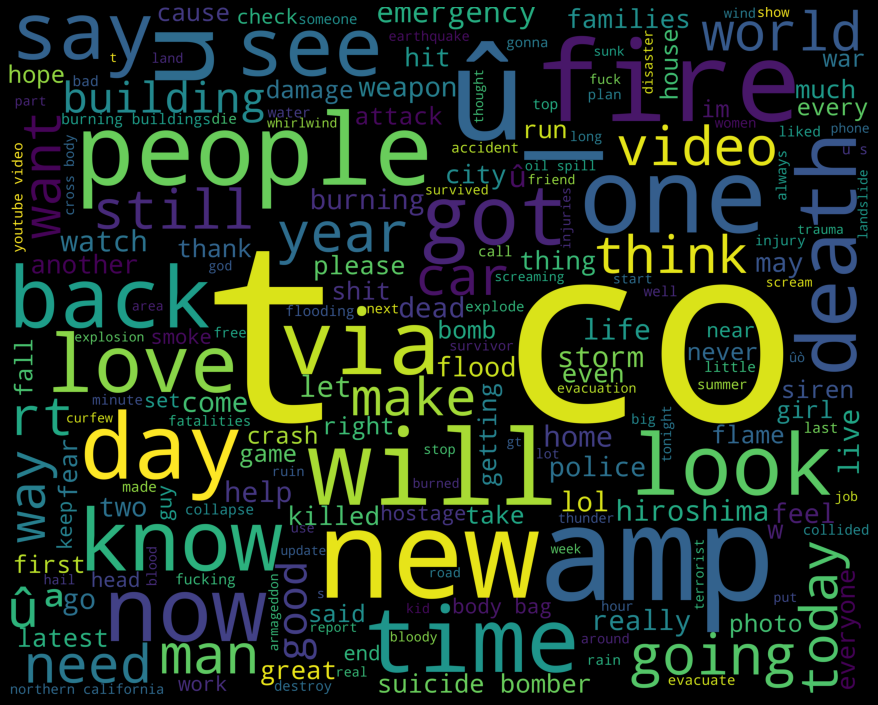

In [82]:
text = train.text.values

Plot_world(text)